In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://www.nike.com/my/launch?s=upcoming"
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}

In [3]:
response = requests.get(url, headers=headers)

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')

In [10]:
soup.find_all('div', class_='available-date-component')

[<div class="available-date-component">Available 10/11 at 4:00 am</div>,
 <div class="available-date-component">Available 10/11 at 4:00 am</div>,
 <div class="available-date-component">Available 11/11 at 2:00 am</div>,
 <div class="available-date-component">Available 11/11 at 2:00 am</div>,
 <div class="available-date-component">Available 14/11 at 4:00 am</div>,
 <div class="available-date-component">Available 14/11 at 4:00 am</div>,
 <div class="available-date-component">Available 14/11 at 4:00 am</div>,
 <div class="available-date-component">Available 14/11 at 4:00 am</div>,
 <div class="available-date-component">Available 15/11 at 4:00 am</div>,
 <div class="available-date-component">Available 16/11 at 4:00 am</div>,
 <div class="available-date-component">Available 16/11 at 4:00 am</div>]

In [11]:
soup.find_all('h3', class_='headline-5')

[<h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Air Jordan 5 </h3>,
 <h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Younger Kids' Jordan 5</h3>,
 <h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Women's Air Jordan 11</h3>,
 <h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Nike SB x TIGHTBOOTH®︎ Dunk Low Pro</h3>,
 <h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Air Max 1 '86</h3>,
 <h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Older Kids' Air Max 1 '86</h3>,
 <h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Younger Kids' Air Max 1 '86</h3>,
 <h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Toddler Air Max 1 '86</h3>,
 <h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Women's Air Jordan 3</h3>,
 <h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Air Force 1 Low</h3>,
 <h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Air VaporMax Moc Roam</h3>]

In [ ]:
soup.find_all('div', class_='d-sm-tc va-sm-m')

[<div class="d-sm-tc va-sm-m"><h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Air Max 2 CB '94</h3><h6 class="text-color-secondary mb-1-sm body-3"><div class="available-date-component">Available 25/10 at 4:00 am</div></h6></div>,
 <div class="d-sm-tc va-sm-m"><h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Women's Air Footscape Woven</h3><h6 class="text-color-secondary mb-1-sm body-3"><div class="available-date-component">Available 25/10 at 4:00 am</div></h6></div>,
 <div class="d-sm-tc va-sm-m"><h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->SB Dunk Low Pro</h3><h6 class="text-color-secondary mb-1-sm body-3"><div class="available-date-component">Available 26/10 at 4:00 am</div></h6></div>,
 <div class="d-sm-tc va-sm-m"><h3 class="headline-5 mb1-sm fs16-sm"> <!-- -->Women's Dunk Low</h3><h6 class="text-color-secondary mb-1-sm body-3"><div class="available-date-component">Available 26/10 at 4:00 am</div></h6></div>,
 <div class="d-sm-tc va-sm-m"><h3 class="headline-5 mb1-sm fs16-sm"> <!-- 

In [12]:
resultlist = []

for item in soup.find_all('div', class_="d-sm-tc va-sm-m"):
  name = item.h3.text.strip()
  date = item.find('div', class_='available-date-component').text.strip()

  result = {
      "Name" : name,
      "Date" : date
  }

  resultlist.append(result)

In [13]:
resultlist

[{'Name': 'Air Jordan 5', 'Date': 'Available 10/11 at 4:00 am'},
 {'Name': "Younger Kids' Jordan 5", 'Date': 'Available 10/11 at 4:00 am'},
 {'Name': "Women's Air Jordan 11", 'Date': 'Available 11/11 at 2:00 am'},
 {'Name': 'Nike SB x TIGHTBOOTH®︎ Dunk Low Pro',
  'Date': 'Available 11/11 at 2:00 am'},
 {'Name': "Air Max 1 '86", 'Date': 'Available 14/11 at 4:00 am'},
 {'Name': "Older Kids' Air Max 1 '86", 'Date': 'Available 14/11 at 4:00 am'},
 {'Name': "Younger Kids' Air Max 1 '86", 'Date': 'Available 14/11 at 4:00 am'},
 {'Name': "Toddler Air Max 1 '86", 'Date': 'Available 14/11 at 4:00 am'},
 {'Name': "Women's Air Jordan 3", 'Date': 'Available 15/11 at 4:00 am'},
 {'Name': 'Air Force 1 Low', 'Date': 'Available 16/11 at 4:00 am'},
 {'Name': 'Air VaporMax Moc Roam', 'Date': 'Available 16/11 at 4:00 am'}]

In [15]:
import json

In [16]:
json_result = json.dumps(resultlist, indent=3)
print(json_result)

[
   {
      "Name": "Air Jordan 5",
      "Date": "Available 10/11 at 4:00 am"
   },
   {
      "Name": "Younger Kids' Jordan 5",
      "Date": "Available 10/11 at 4:00 am"
   },
   {
      "Name": "Women's Air Jordan 11",
      "Date": "Available 11/11 at 2:00 am"
   },
   {
      "Name": "Nike SB x TIGHTBOOTH\u00ae\ufe0e Dunk Low Pro",
      "Date": "Available 11/11 at 2:00 am"
   },
   {
      "Name": "Air Max 1 '86",
      "Date": "Available 14/11 at 4:00 am"
   },
   {
      "Name": "Older Kids' Air Max 1 '86",
      "Date": "Available 14/11 at 4:00 am"
   },
   {
      "Name": "Younger Kids' Air Max 1 '86",
      "Date": "Available 14/11 at 4:00 am"
   },
   {
      "Name": "Toddler Air Max 1 '86",
      "Date": "Available 14/11 at 4:00 am"
   },
   {
      "Name": "Women's Air Jordan 3",
      "Date": "Available 15/11 at 4:00 am"
   },
   {
      "Name": "Air Force 1 Low",
      "Date": "Available 16/11 at 4:00 am"
   },
   {
      "Name": "Air VaporMax Moc Roam",
      "Date":

In [ ]:
import re

In [ ]:
for item in soup.find_all('div', class_="d-sm-tc va-sm-m"):
  name = item.h3.text.strip()
  date = item.find('div', class_='available-date-component').text.strip()

  date_match = re.search(r'(\d{1,2}/\d{1,2})', date)
  time_match = re.search(r'(\d{1,2}:\d{2} [APMapm]{2})', date)
  print(time_match)

<re.Match object; span=(19, 26), match='4:00 am'>
<re.Match object; span=(19, 26), match='4:00 am'>
<re.Match object; span=(19, 26), match='4:00 am'>
<re.Match object; span=(19, 26), match='4:00 am'>
<re.Match object; span=(19, 26), match='4:00 am'>
<re.Match object; span=(19, 26), match='2:00 am'>
<re.Match object; span=(19, 26), match='2:00 am'>
<re.Match object; span=(19, 26), match='4:00 am'>


In [ ]:
resultlist = []

for item in soup.find_all('div', class_="d-sm-tc va-sm-m"):
  name = item.h3.text.strip()
  date = item.find('div', class_='available-date-component').text.strip()

  date_match = re.search(r'(\d{1,2}/\d{1,2})', date)
  time_match = re.search(r'(\d{1,2}:\d{2} [APMapm]{2})', date)

  if date_match and time_match:
    date = date_match.group(1)
    time = time_match.group(1)

    result = {
      "Name" : name,
      "Date" : date,
      "Time" : time
    }

  resultlist.append(result)

json_result = json.dumps(resultlist, indent=3)

In [ ]:
print(json_result)

[
   {
      "Name": "Air Max 2 CB '94",
      "Date": "25/10",
      "Time": "4:00 am"
   },
   {
      "Name": "Women's Air Footscape Woven",
      "Date": "25/10",
      "Time": "4:00 am"
   },
   {
      "Name": "SB Dunk Low Pro",
      "Date": "26/10",
      "Time": "4:00 am"
   },
   {
      "Name": "Women's Dunk Low",
      "Date": "26/10",
      "Time": "4:00 am"
   },
   {
      "Name": "Air Humara",
      "Date": "27/10",
      "Time": "4:00 am"
   },
   {
      "Name": "Air Jordan 13",
      "Date": "28/10",
      "Time": "2:00 am"
   },
   {
      "Name": "Air Jordan 12",
      "Date": "28/10",
      "Time": "2:00 am"
   },
   {
      "Name": "Air VaporMax Moc Roam",
      "Date": "31/10",
      "Time": "4:00 am"
   }
]


### `Time adjustment`

In [ ]:
from datetime import datetime, timedelta
import pytz

In [17]:
from datetime import datetime, timedelta
import pytz
import json
import re

resultlist = []

for item in soup.find_all("a", class_='ncss-col-sm-8 launch-details u-full-height va-sm-t full'):
    link = 'https://www.nike.com'+ item['href']
    name = item.h3.text.strip()
    date = item.find('div', class_='available-date-component').text.strip()

    date_match = re.search(r'(\d{1,2}/\d{1,2})', date)
    time_match = re.search(r'(\d{1,2}:\d{2} [APMapm]{2})', date)

    if date_match and time_match:
        date = date_match.group(1)
        time = time_match.group(1)

        # Convert the time to UTC+8
        datetime_str = f"{date} {time}"
        datetime_obj = datetime.strptime(datetime_str, "%d/%m %I:%M %p")

        # Assuming UTC is the original timezone of your input
        utc_time = datetime_obj.replace(tzinfo=pytz.utc)
        utc_plus_8_time = utc_time.astimezone(pytz.timezone("Asia/Shanghai"))

        result = {
            "Name": name,
            "Date": date,
            "Time": time,
            "Time (UTC+8)": utc_plus_8_time.strftime("%H:%M %p"),
            'Link': link
        }

        resultlist.append(result)

json_result = json.dumps(resultlist, indent=3)
print(json_result)


[
   {
      "Name": "Air Jordan 5",
      "Date": "10/11",
      "Time": "4:00 am",
      "Time (UTC+8)": "12:06 PM",
      "Link": "https://www.nike.com/my/launch/t/air-jordan-5-navy"
   },
   {
      "Name": "Younger Kids' Jordan 5",
      "Date": "10/11",
      "Time": "4:00 am",
      "Time (UTC+8)": "12:06 PM",
      "Link": "https://www.nike.com/my/launch/t/air-jordan-5-navy"
   },
   {
      "Name": "Women's Air Jordan 11",
      "Date": "11/11",
      "Time": "2:00 am",
      "Time (UTC+8)": "10:06 AM",
      "Link": "https://www.nike.com/my/launch/t/womens-air-jordan-11-neapolitan"
   },
   {
      "Name": "Nike SB x TIGHTBOOTH\u00ae\ufe0e Dunk Low Pro",
      "Date": "11/11",
      "Time": "2:00 am",
      "Time (UTC+8)": "10:06 AM",
      "Link": "https://www.nike.com/my/launch/t/nike-sb-tightbooth-dunk-low-pro-black-and-white"
   },
   {
      "Name": "Air Max 1 '86",
      "Date": "14/11",
      "Time": "4:00 am",
      "Time (UTC+8)": "12:06 PM",
      "Link": "https://w

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json(json_result)

In [ ]:
df

,Name,Date,Time,Time (UTC+8),Link
0,ISPA Universal,24/10,4:00 am,12:06 PM,https://www.nike.com/my/launch/t/ispa-universa...
1,Women's Cortez,24/10,4:00 am,12:06 PM,https://www.nike.com/my/launch/t/womens-cortez...
2,Air Max 2 CB '94,25/10,4:00 am,12:06 PM,https://www.nike.com/my/launch/t/nike-air-max-...
3,Women's Air Footscape Woven,25/10,4:00 am,12:06 PM,https://www.nike.com/my/launch/t/womens-air-fo...
4,Air Humara,27/10,4:00 am,12:06 PM,https://www.nike.com/my/launch/t/air-humara-bu...
5,Air Jordan 13,28/10,2:00 am,10:06 AM,https://www.nike.com/my/launch/t/air-jordan-13...
6,Air Jordan 12,28/10,2:00 am,10:06 AM,https://www.nike.com/my/launch/t/air-jordan-12...


In [ ]:
links = soup.find_all("a", class_='ncss-col-sm-8 launch-details u-full-height va-sm-t full')

In [ ]:
for linklist in links:

  raw = linklist['href']
  url_pattern = r'/([^/]+)$'

  matches = re.findall(url_pattern, raw)

  for match in matches:
    print(match)


nike-air-max-2-cb-94-black-and-metallic-silver
womens-air-footscape-woven-fir
sb-dunk-low-pro-black-and-gum
womens-dunk-low-summit-white-and-cacao-wow
air-humara-buff-gold
air-jordan-13-wheat
air-jordan-12-cherry
air-vapormax-moc-roam-light-stone-and-luminous-green


In [ ]:
#skuraw = soup.find_all('a', class_='card-link d-sm-b')

https://api.nike.com/deliver/available_gtins/v3/?filter=styleColor(SKUID)&filter=merchGroup(XA)

In [ ]:
for extract in skuraw:
  print(extract.find_all('img', class_='image-component'))

[]
[]
[]
[]
[]
[]
[]
[]


In [ ]:
skuraw = soup.find_all('img', class_='image-component')
sku_pattern = r'/([a-zA-Z0-9-]+)-release-date\.jpg$'
for items in skuraw :
  skuid = items['src']
  match = re.search(sku_pattern, skuid)
  if match:
    sku_id = match.group(1)
    print(sku_id)
    print((sku_id[-10:]).upper())
  else:
    print("SKU ID not found")

nike-air-max-2-cb-94-black-and-metallic-silver-dc1411-001
DC1411-001
women-s-air-footscape-woven-fir-fn3540-300
FN3540-300
sb-dunk-low-pro-black-and-gum-cd2563-006
CD2563-006
women-s-dunk-low-summit-white-and-cacao-wow-fv3642-010
FV3642-010
air-humara-buff-gold-fj7098-701
FJ7098-701
air-jordan-13-wheat-414571-171
414571-171
air-jordan-12-cherry-ct8013-116
CT8013-116
air-vapormax-moc-roam-light-stone-and-luminous-green-dz7273-100
DZ7273-100


In [ ]:
url_part = "women-s-air-footscape-woven-fir-fn3540-300"
print(url_part[-10:])

fn3540-300


In [ ]:
#merge

from datetime import datetime, timedelta
import pytz
import json
import re

resultlist = []

details = soup.find_all("a", class_='ncss-col-sm-8 launch-details u-full-height va-sm-t full')
skuraw = soup.find_all('img', class_='image-component')

for item, sku in zip(details, skuraw) :
    link = 'https://www.nike.com'+ item['href']
    name = item.h3.text.strip()
    date = item.find('div', class_='available-date-component').text.strip()

    date_match = re.search(r'(\d{1,2}/\d{1,2})', date)
    time_match = re.search(r'(\d{1,2}:\d{2} [APMapm]{2})', date)
    sku_pattern = r'/([a-zA-Z0-9-]+)-release-date\.jpg$'

    skuid = sku['src']
    match = re.search(sku_pattern, skuid)
    if match:
      sku_id = match.group(1)
      ref = sku_id[:-11]

      if date_match and time_match:
          date = date_match.group(1)
          time = time_match.group(1)

          # Convert the time to UTC+8
          datetime_str = f"{date} {time}"
          datetime_obj = datetime.strptime(datetime_str, "%d/%m %I:%M %p")

          # Assuming UTC is the original timezone of your input
          utc_time = datetime_obj.replace(tzinfo=pytz.utc)
          utc_plus_8_time = utc_time.astimezone(pytz.timezone("Asia/Shanghai"))

          result = {
              "Name": name,
              "Date": date,
              "Time": time,
              "Time (UTC+8)": utc_plus_8_time.strftime("%H:%M %p"),
              'Link': link,
              'Skuid' : (sku_id[-10:]).upper(),
              'Reference' : ref
          }

          resultlist.append(result)

#resultlist the json output of the scrapped data
json_result = json.dumps(resultlist, indent=3)
print(json_result)


[
   {
      "Name": "Air Jordan 13",
      "Date": "28/10",
      "Time": "2:00 am",
      "Time (UTC+8)": "10:06 AM",
      "Link": "https://www.nike.com/my/launch/t/air-jordan-13-wheat",
      "Skuid": "414571-171",
      "Reference": "air-jordan-13-wheat"
   },
   {
      "Name": "Air Jordan 12",
      "Date": "28/10",
      "Time": "2:00 am",
      "Time (UTC+8)": "10:06 AM",
      "Link": "https://www.nike.com/my/launch/t/air-jordan-12-cherry",
      "Skuid": "CT8013-116",
      "Reference": "air-jordan-12-cherry"
   },
   {
      "Name": "Air VaporMax Moc Roam",
      "Date": "31/10",
      "Time": "4:00 am",
      "Time (UTC+8)": "12:06 PM",
      "Link": "https://www.nike.com/my/launch/t/air-vapormax-moc-roam-light-stone-and-luminous-green",
      "Skuid": "DZ7273-100",
      "Reference": "air-vapormax-moc-roam-light-stone-and-luminous-green"
   },
   {
      "Name": "Terminator High",
      "Date": "01/11",
      "Time": "4:00 am",
      "Time (UTC+8)": "12:06 PM",
      "Lin

In [ ]:
x = 0
shoes_ref = resultlist[x]['Reference']
sizecall = "https://api.nike.com/product_feed/threads/v3/?filter=marketplace%28MY%29&filter=language%28en-GB%29&filter=channelId%28010794e5-35fe-4e32-aaff-cd2c74f89d61%29&filter=seoSlugs%28" + shoes_ref + "%29&filter=exclusiveAccess%28true%2Cfalse%29"

In [ ]:
sizecall

'https://api.nike.com/product_feed/threads/v3/?filter=marketplace%28MY%29&filter=language%28en-GB%29&filter=channelId%28010794e5-35fe-4e32-aaff-cd2c74f89d61%29&filter=seoSlugs%28sb-dunk-low-pro-black-and-gum%29&filter=exclusiveAccess%28true%2Cfalse%29'

In [ ]:
stocklevelurl = requests.get(sizecall, headers=headers)

In [ ]:
stocklevelsoup = BeautifulSoup(stocklevelurl.content, 'html.parser')

In [ ]:
with open('output.json', 'w') as json_file:

  json.dump(stocklevelurl.json(), json_file)

In [ ]:
def find_key(json_data, target_key, current_path=None):
    if current_path is None:
        current_path = []

    if isinstance(json_data, dict):
        for key, value in json_data.items():
            new_path = current_path + [key]
            if key == target_key:
                print(f"Found {target_key} {value} at path: {'.'.join(new_path)}")
            find_key(value, target_key, new_path)
    elif isinstance(json_data, list):
        for index, item in enumerate(json_data):
            new_path = current_path + [str(index)]
            find_key(item, target_key, new_path)


In [ ]:
productsizejson = stocklevelurl.json()

In [ ]:
find_key(productsizejson, 'gtin')

Found gtin 00196969080570 at path: objects.0.productInfo.0.skus.0.gtin
Found gtin 00196969080587 at path: objects.0.productInfo.0.skus.1.gtin
Found gtin 00196969080594 at path: objects.0.productInfo.0.skus.2.gtin
Found gtin 00196969080600 at path: objects.0.productInfo.0.skus.3.gtin
Found gtin 00196969080617 at path: objects.0.productInfo.0.skus.4.gtin
Found gtin 00196969080624 at path: objects.0.productInfo.0.skus.5.gtin
Found gtin 00196969080631 at path: objects.0.productInfo.0.skus.6.gtin
Found gtin 00196969080648 at path: objects.0.productInfo.0.skus.7.gtin
Found gtin 00196969080655 at path: objects.0.productInfo.0.skus.8.gtin
Found gtin 00196969080662 at path: objects.0.productInfo.0.skus.9.gtin
Found gtin 00196969080679 at path: objects.0.productInfo.0.skus.10.gtin
Found gtin 00196969080693 at path: objects.0.productInfo.0.skus.11.gtin
Found gtin 00196969080570 at path: objects.0.productInfo.0.availableGtins.0.gtin
Found gtin 00196969080587 at path: objects.0.productInfo.0.availa

In [ ]:
data = productsizejson

skus_data = [
    {"nikeSize": sku["nikeSize"],
     "gtin": sku["gtin"]
     }
    for product_info in data["objects"][0]["productInfo"]
    for sku in product_info.get("skus", [])
]

# Extract "gtin" and "level" from "availableGtins"
available_gtins_data = [
    {"gtin": gtin["gtin"], "level": gtin["level"]}
    for product_info in data["objects"][0]["productInfo"]
    for gtin in product_info.get("availableGtins", [])
]

# Combine the information
combined_data = [
    {
        "gtin": sku["gtin"],
        "nikeSize": sku["nikeSize"],
        "level": gtin["level"]
        }
    for sku in skus_data
    for gtin in available_gtins_data
    if sku["gtin"] == gtin["gtin"]
]
test = {
    "productname" : shoes_ref,
    "size" : combined_data }


# Print the final result
print(json.dumps(test, indent=2))

{
  "productname": "air-jordan-13-wheat",
  "size": [
    {
      "gtin": "00196969165833",
      "nikeSize": "8",
      "level": "LOW"
    },
    {
      "gtin": "00196969165840",
      "nikeSize": "8.5",
      "level": "LOW"
    },
    {
      "gtin": "00196969165857",
      "nikeSize": "9",
      "level": "LOW"
    },
    {
      "gtin": "00196969165864",
      "nikeSize": "9.5",
      "level": "LOW"
    },
    {
      "gtin": "00196969165871",
      "nikeSize": "10",
      "level": "LOW"
    },
    {
      "gtin": "00196969165888",
      "nikeSize": "10.5",
      "level": "LOW"
    },
    {
      "gtin": "00196969165895",
      "nikeSize": "11",
      "level": "LOW"
    },
    {
      "gtin": "00196969165918",
      "nikeSize": "12",
      "level": "LOW"
    },
    {
      "gtin": "00196969165932",
      "nikeSize": "13",
      "level": "LOW"
    }
  ]
}


00196969165833 8
00196969165840 8.5
00196969165857 9
00196969165864 9.5
00196969165871 10
00196969165888 10.5
00196969165895 11
00196969165918 12
00196969165932 13


# **Production**

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
from datetime import datetime, timedelta
import pytz
import json
import re

url = "https://www.nike.com/my/launch?s=upcoming"
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}

itemlist = []
shoe_size = []




def scrap():
  response = requests.get(url,headers=headers)
  soup = BeautifulSoup(response.content, 'html.parser')

  details = soup.find_all("a", class_='ncss-col-sm-8 launch-details u-full-height va-sm-t full')

  skuraw = soup.find_all('img', class_='image-component')

  for item, sku in zip(details, skuraw) :
    link = 'https://www.nike.com'+ item['href']
    name = item.h3.text.strip()
    date = item.find('div', class_='available-date-component').text.strip()

    date_match = re.search(r'(\d{1,2}/\d{1,2})', date)
    time_match = re.search(r'(\d{1,2}:\d{2} [APMapm]{2})', date)
    sku_pattern = r'/([a-zA-Z0-9-]+)-release-date\.jpg$'

    skuid = sku['src']
    match = re.search(sku_pattern, skuid)
    if match:
      sku_id = match.group(1)
      ref = sku_id[:-11]

      if date_match and time_match:
          date = date_match.group(1)
          time = time_match.group(1)

          # Convert the time to UTC+8
          datetime_str = f"{date} {time}"
          datetime_obj = datetime.strptime(datetime_str, "%d/%m %I:%M %p")

          # Assuming UTC is the original timezone of your input
          utc_time = datetime_obj.replace(tzinfo=pytz.utc)
          utc_plus_8_time = utc_time.astimezone(pytz.timezone("Asia/Shanghai"))

          result = {
              "Name": name,
              "Date": date,
              "Time": time,
              "Time (UTC+8)": utc_plus_8_time.strftime("%H:%M %p"),
              'Link': link,
              'Skuid' : (sku_id[-10:]).upper(),
              'Reference' : ref
          }

          itemlist.append(result)

def sizeapi(shoes_ref):
  sizecall = "https://api.nike.com/product_feed/threads/v3/?filter=marketplace%28MY%29&filter=language%28en-GB%29&filter=channelId%28010794e5-35fe-4e32-aaff-cd2c74f89d61%29&filter=seoSlugs%28" + shoes_ref + "%29&filter=exclusiveAccess%28true%2Cfalse%29"
  stocklevelurl = requests.get(sizecall, headers=headers)

  data = stocklevelurl.json()

  skus_data = [
    {"nikeSize": sku["nikeSize"],"gtin": sku["gtin"]}
    for product_info in data["objects"][0]["productInfo"]
    for sku in product_info.get("skus", [])
  ]

  # Extract "gtin" and "level" from "availableGtins"
  available_gtins_data = [
    {"gtin": gtin["gtin"], "level": gtin["level"]}
    for product_info in data["objects"][0]["productInfo"]
    for gtin in product_info.get("availableGtins", [])
  ]

    # Combine the information
  combined_data = [
      {
        "gtin": sku["gtin"],
        "nikeSize": sku["nikeSize"],
        "level": gtin["level"]
        }
    for sku in skus_data
    for gtin in available_gtins_data
    if sku["gtin"] == gtin["gtin"]
  ]

  parseData = {
    "productname" : shoes_ref,
    "size" : combined_data }

  # Convert combined_data dictionary outside list
  shoe_size.append(parseData)

if __name__ == "__main__":
  print('test')




test


In [ ]:
!pip freeze > requirements.txt

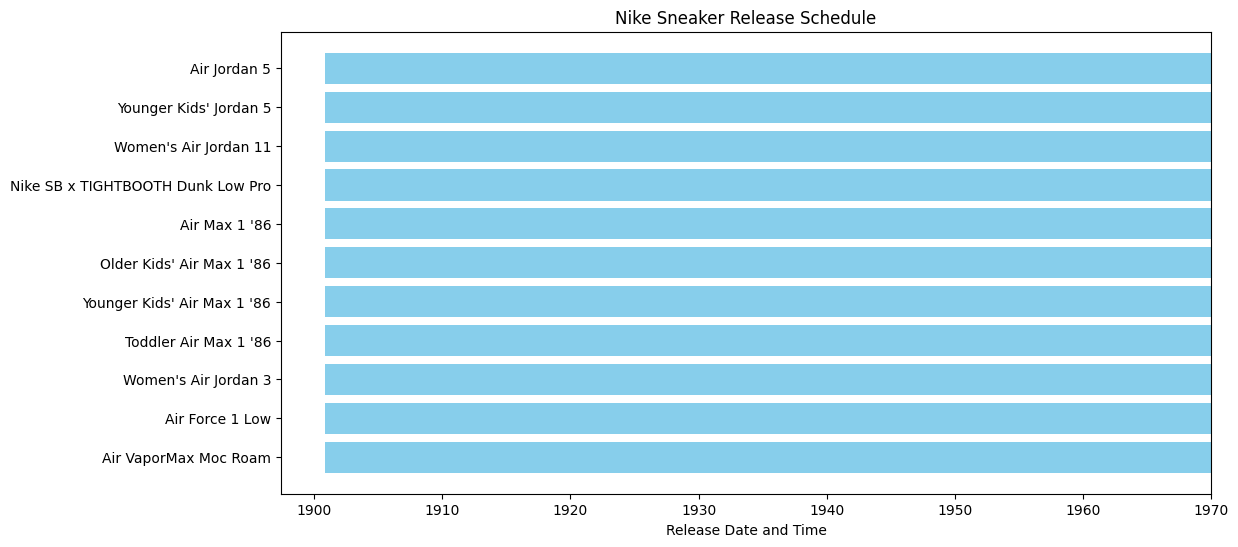

In [19]:
import matplotlib.pyplot as plt
from datetime import datetime

data = [
    {"Name": "Air Jordan 5", "Date": "10/11", "Time": "4:00 am", "Time (UTC+8)": "12:06 PM", "Link": "https://www.nike.com/my/launch/t/air-jordan-5-navy"},
    {"Name": "Younger Kids' Jordan 5", "Date": "10/11", "Time": "4:00 am", "Time (UTC+8)": "12:06 PM", "Link": "https://www.nike.com/my/launch/t/air-jordan-5-navy"},
    {"Name": "Women's Air Jordan 11", "Date": "11/11", "Time": "2:00 am", "Time (UTC+8)": "10:06 AM", "Link": "https://www.nike.com/my/launch/t/womens-air-jordan-11-neapolitan"},
    {"Name": "Nike SB x TIGHTBOOTH Dunk Low Pro", "Date": "11/11", "Time": "2:00 am", "Time (UTC+8)": "10:06 AM", "Link": "https://www.nike.com/my/launch/t/nike-sb-tightbooth-dunk-low-pro-black-and-white"},
    {"Name": "Air Max 1 '86", "Date": "14/11", "Time": "4:00 am", "Time (UTC+8)": "12:06 PM", "Link": "https://www.nike.com/my/launch/t/air-max-1-86-blue-grey-and-black"},
    {"Name": "Older Kids' Air Max 1 '86", "Date": "14/11", "Time": "4:00 am", "Time (UTC+8)": "12:06 PM", "Link": "https://www.nike.com/my/launch/t/air-max-1-86-blue-grey-and-black"},
    {"Name": "Younger Kids' Air Max 1 '86", "Date": "14/11", "Time": "4:00 am", "Time (UTC+8)": "12:06 PM", "Link": "https://www.nike.com/my/launch/t/air-max-1-86-blue-grey-and-black"},
    {"Name": "Toddler Air Max 1 '86", "Date": "14/11", "Time": "4:00 am", "Time (UTC+8)": "12:06 PM", "Link": "https://www.nike.com/my/launch/t/air-max-1-86-blue-grey-and-black"},
    {"Name": "Women's Air Jordan 3", "Date": "15/11", "Time": "4:00 am", "Time (UTC+8)": "12:06 PM", "Link": "https://www.nike.com/my/launch/t/womens-air-jordan-3-off-noir"},
    {"Name": "Air Force 1 Low", "Date": "16/11", "Time": "4:00 am", "Time (UTC+8)": "12:06 PM", "Link": "https://www.nike.com/my/launch/t/air-force-1-low-chocolate"},
    {"Name": "Air VaporMax Moc Roam", "Date": "16/11", "Time": "4:00 am", "Time (UTC+8)": "12:06 PM", "Link": "https://www.nike.com/my/launch/t/air-vapormax-moc-roam-black"},
]

# Convert date and time strings to datetime objects
for entry in data:
    entry["Datetime"] = datetime.strptime(f'{entry["Date"]} {entry["Time"]}', '%d/%m %I:%M %p')

# Sort data by datetime
data.sort(key=lambda x: x["Datetime"])

# Extract labels and values for plotting
labels = [entry["Name"] for entry in data]
values = [entry["Datetime"] for entry in data]

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Release Date and Time')
plt.title('Nike Sneaker Release Schedule')
plt.gca().invert_yaxis()  # Reverse the order of sneakers
plt.show()
